In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

K.set_image_data_format('channels_last')

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# Loading the Data Set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/satellite'

train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 5145 images belonging to 4 classes.


# Sample Input Images

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 1.]')

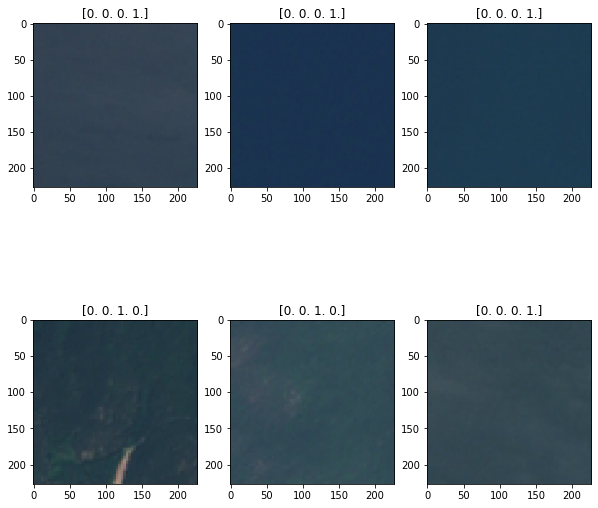

In [5]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

# Alexa Net Feature Extractor

In [6]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(4,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [7]:
alex = AlexNet(train[0][0].shape[1:])

In [8]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [9]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [10]:
alex.fit_generator(train,epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
161/161 [==============================] - 1814s 11s/step - loss: 2.3051 - accuracy: 0.7034
Epoch 2/10
161/161 [==============================] - 20s 126ms/step - loss: 0.4519 - accuracy: 0.8173
Epoch 3/10
161/161 [==============================] - 21s 127ms/step - loss: 0.4329 - accuracy: 0.8332
Epoch 4/10
161/161 [==============================] - 20s 126ms/step - loss: 0.3636 - accuracy: 0.8638
Epoch 5/10
161/161 [==============================] - 20s 126ms/step - loss: 0.3383 - accuracy: 0.8671
Epoch 6/10
161/161 [==============================] - 21s 128ms/step - loss: 0.3317 - accuracy: 0.8737
Epoch 7/10
161/161 [==============================] - 20s 125ms/step - loss: 0.4479 - accuracy: 0.8486
Epoch 8/10
161/161 [==============================] - 20s 127ms/step - loss: 0.3233 - accuracy: 0.8742
Epoch 9/10
161/161 [==============================] - 20s 126ms/step - loss: 0.2874 - accuracy: 0.8847
Epoch 10/10
161/161 [==============================] - 20s 126ms/step - l

In [11]:
path_test = '/content/drive/MyDrive/test_satellite'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 486 images belonging to 4 classes.


# Accuracy

In [12]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Loss = 1.5760679244995117
Test Accuracy = 0.6831275820732117
